In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from prepare import zillow_pipeline

In [2]:
df = zillow_pipeline()

In [18]:
df.head()

,bedrooms,bathrooms,area,value,year,county,state,bedrooms_bins,bathrooms_bins,area_bins,value_bins
0,4,3.5,3100,1023282,1998,Orange,CA,"(3.0, 4.0]","(3.0, 4.0]","(3000.0, 4000.0]","(1000000.0, 2000000.0]"
1,2,1.0,1465,464000,1967,Ventura,CA,"(1.0, 2.0]","(-1.0, 1.0]","(1000.0, 2000.0]","(-1.0, 1000000.0]"
2,3,2.0,1243,564778,1962,Orange,CA,"(2.0, 3.0]","(1.0, 2.0]","(1000.0, 2000.0]","(-1.0, 1000000.0]"
3,4,3.0,2376,145143,1970,Los Angeles,CA,"(3.0, 4.0]","(2.0, 3.0]","(2000.0, 3000.0]","(-1.0, 1000000.0]"
4,4,3.0,2962,773303,1950,Los Angeles,CA,"(3.0, 4.0]","(2.0, 3.0]","(2000.0, 3000.0]","(-1.0, 1000000.0]"


In [4]:
df.shape

(52246, 7)

In [5]:
df.isna().sum()

bedrooms     0
bathrooms    0
area         0
value        0
year         0
county       0
state        0
dtype: int64

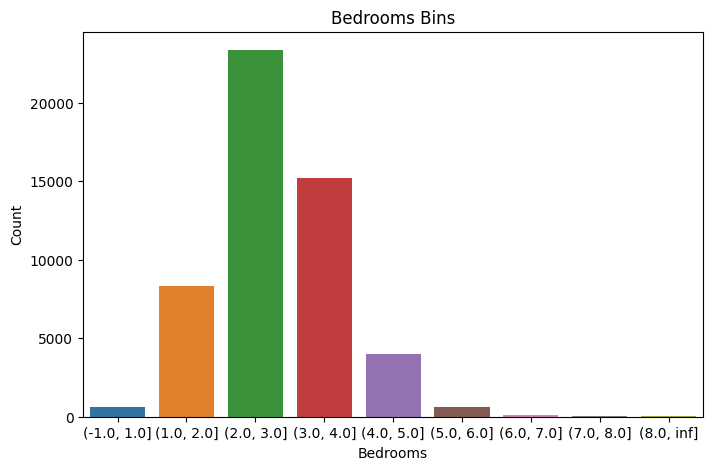

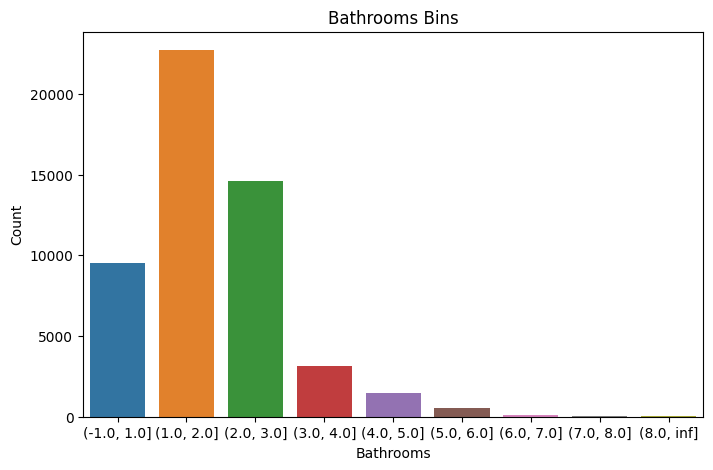

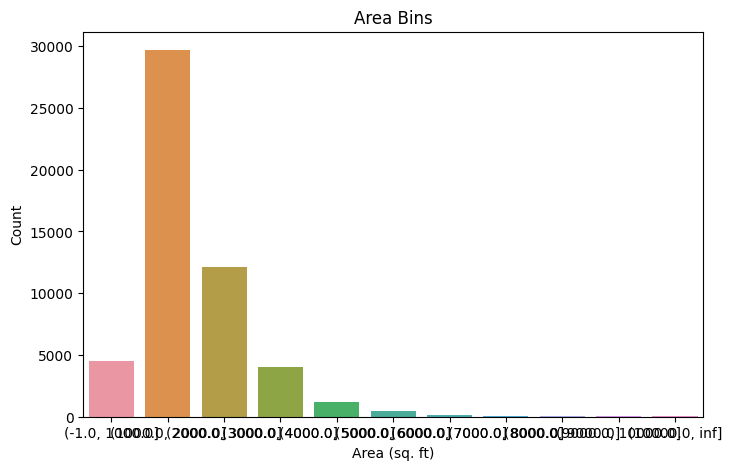

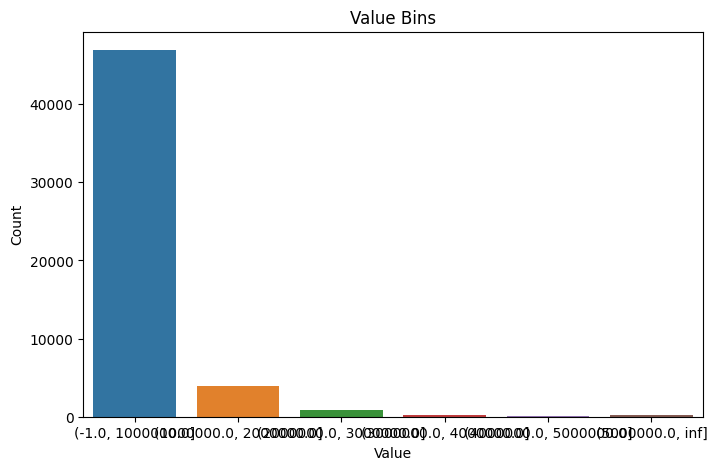

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom bin function
def custom_value_bins(value):
    if value >= 5000000:
        return 5000001
    else:
        return value


# Define custom bins for each column
bedrooms_bins = [-1, 1, 2, 3, 4, 5, 6, 7, 8, float('inf')]  # Bedrooms
bathrooms_bins = [-1, 1, 2, 3, 4, 5, 6, 7, 8, float('inf')]  # Bathrooms
area_bins = [-1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]  # Area (sq. ft)
# Create a new column 'value_bins' with the modified values
df['value_bins'] = df['value'].apply(custom_value_bins)

# Create new columns with the bin labels
df['bedrooms_bins'] = pd.cut(df['bedrooms'], bins=bedrooms_bins)
df['bathrooms_bins'] = pd.cut(df['bathrooms'], bins=bathrooms_bins)
df['area_bins'] = pd.cut(df['area'], bins=area_bins)
df['value_bins'] = pd.cut(df['value'], bins=value_bins)

# Plot each visualization separately

# Bedrooms
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bedrooms_bins')
plt.title('Bedrooms Bins')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

# Bathrooms
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bathrooms_bins')
plt.title('Bathrooms Bins')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

# Area
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='area_bins')
plt.title('Area Bins')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Count')
plt.show()

# Value
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='value_bins')
plt.title('Value Bins')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()
